## Answer 1

In [111]:
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.pyplot import figure
from matplotlib import colors
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [7]:
 def normalize(x):
    return x/((x.max()-x.min())*1.0)

In [8]:
def solve(images):
    for img in images:
        fig = plt.figure(figsize=(13,13));
        img = mpimg.imread(img)
        plt.imshow(img);
        
        x=np.matrix(np.arange(0,321,1))
        channel_4=np.repeat(x, 481, axis=0).T
        channel_4=np.expand_dims(channel_4, axis=2)
        feature=np.concatenate([img,channel_4],axis=-1)
        
        x=np.matrix(np.arange(0,481,1))
        channel_5=np.repeat(x, 321, axis=0)
        channel_5=np.expand_dims(channel_5, axis=2)
        feature=np.concatenate([feature,channel_5],axis=-1)
        feature=feature*1.0
        
        for channel in range(feature.shape[2]):
            feature[:,:,channel]=(normalize(feature[:,:,channel]))
            
        feature=feature.reshape((-1,5))
        feature.shape
        
        for clusters in [2,3,4,5]:
            fig = plt.figure(figsize=(13,13));
            kmeans = KMeans(n_clusters=clusters, random_state=0).fit(feature)
            bitmap=(kmeans.labels_.reshape(img.shape[0],img.shape[1]))
            plt.imshow(bitmap);
            plt.show()
            
            
        for clusters in [2,3,4,5]:
            fig = plt.figure(figsize=(13,13));
            gmm = GaussianMixture(n_components=clusters).fit(feature)
            labels = gmm.predict(feature)
            bitmap=(labels.reshape(img.shape[0],img.shape[1]))
            plt.imshow(bitmap);
            plt.show()

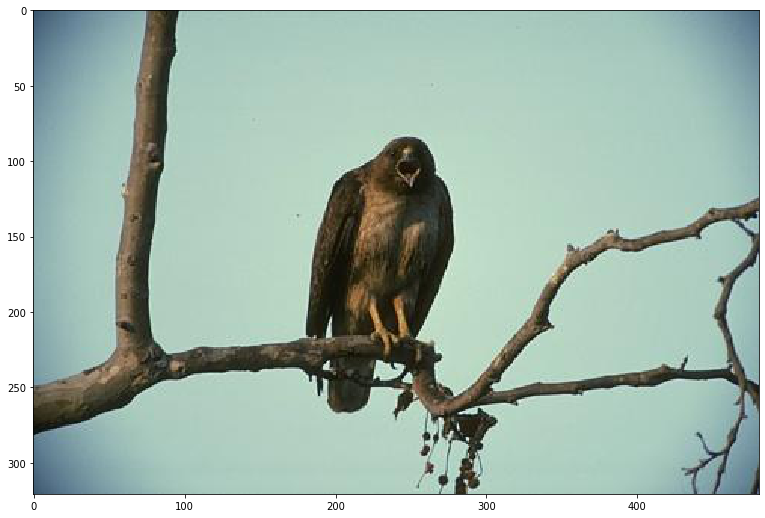

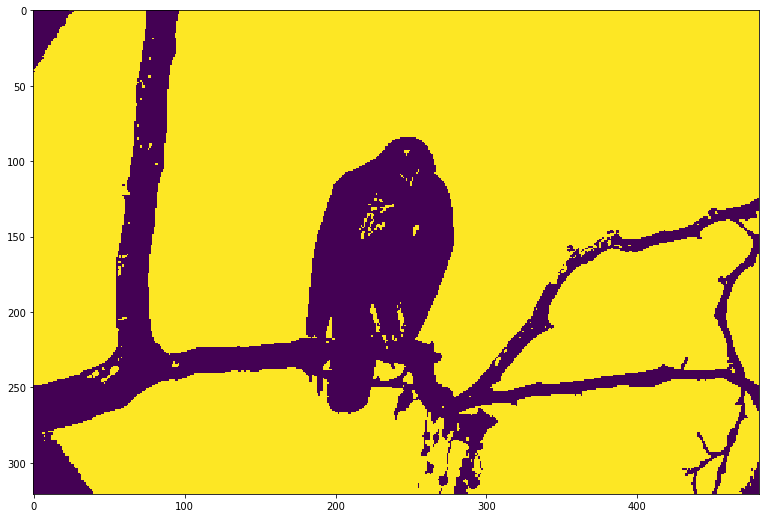

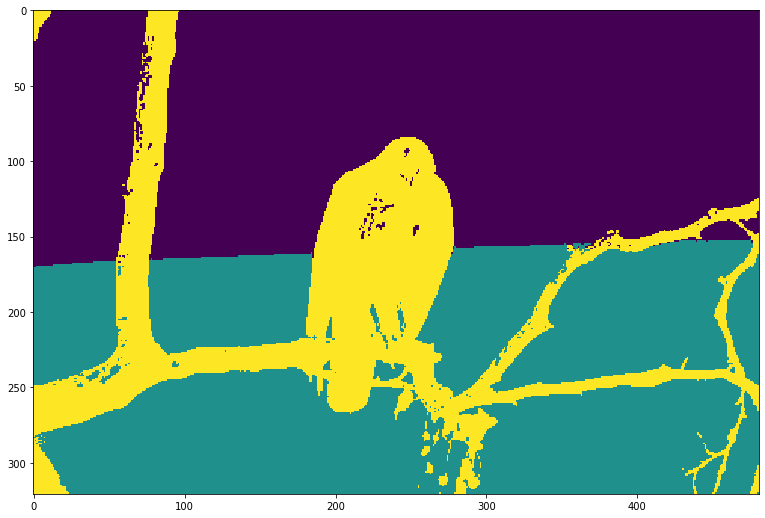

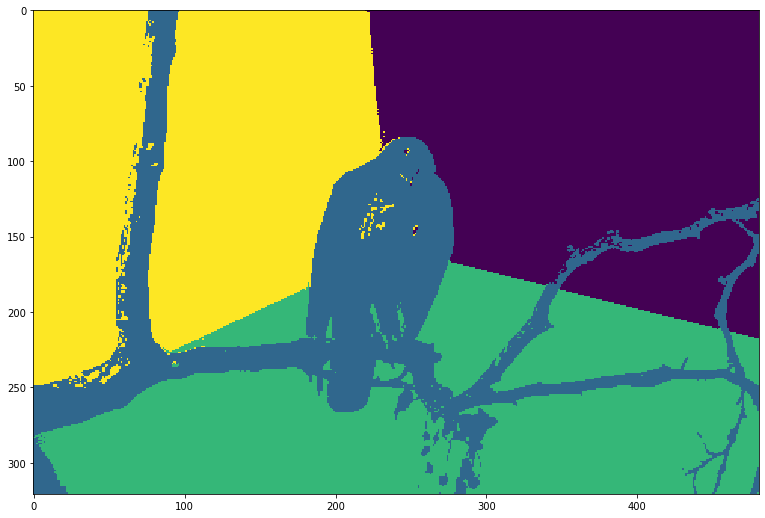

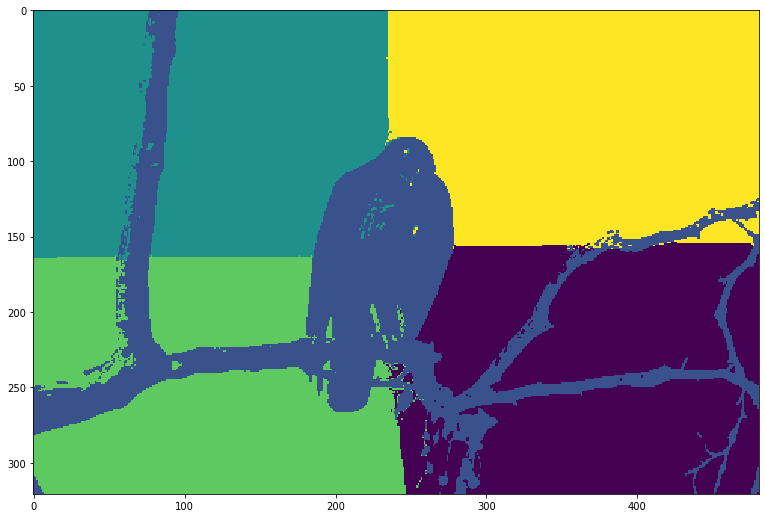

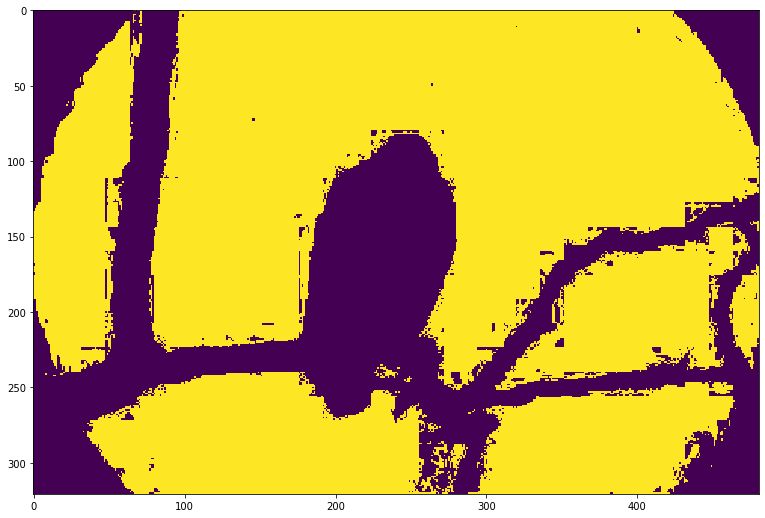

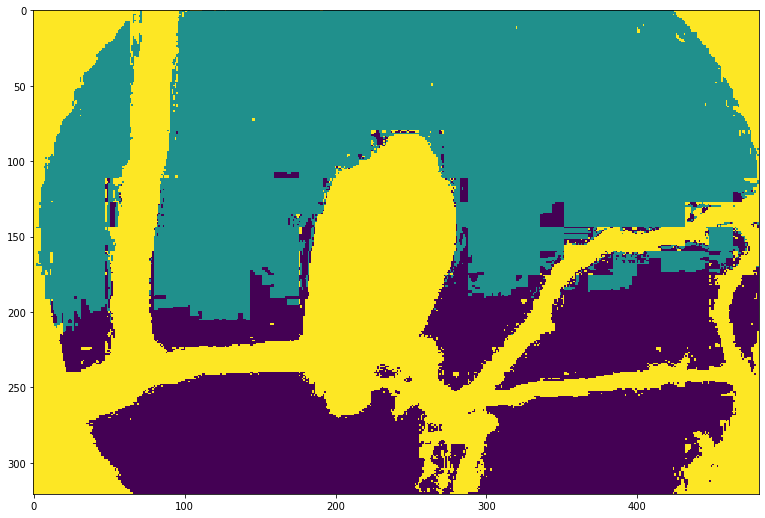

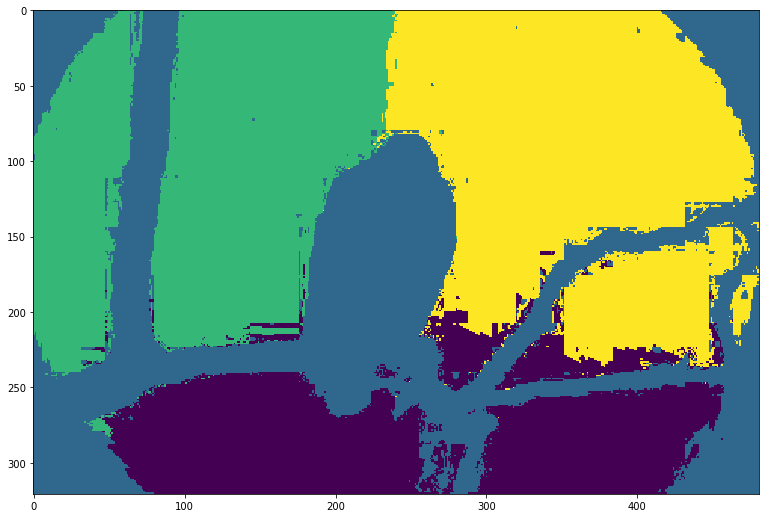

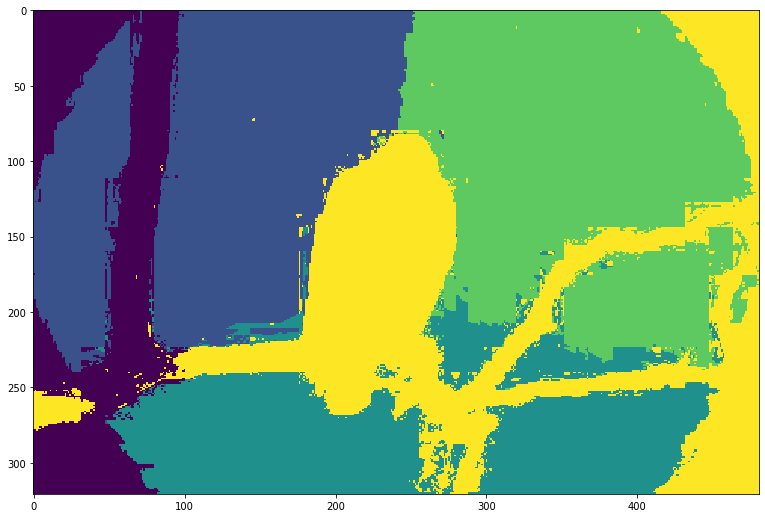

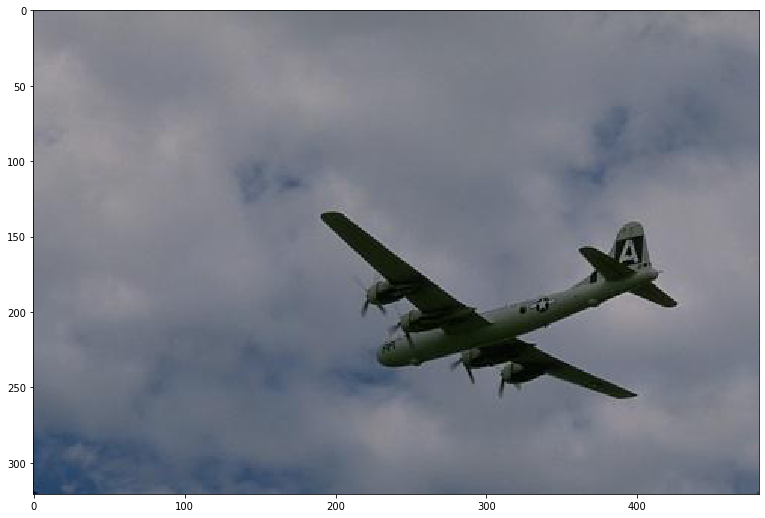

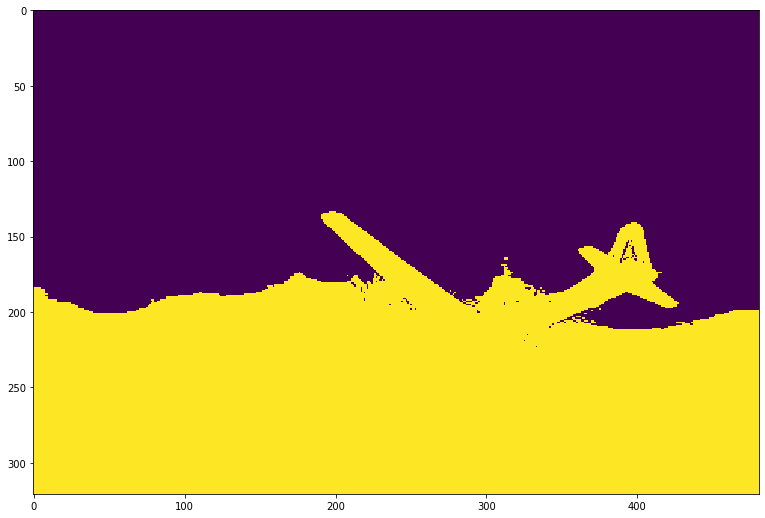

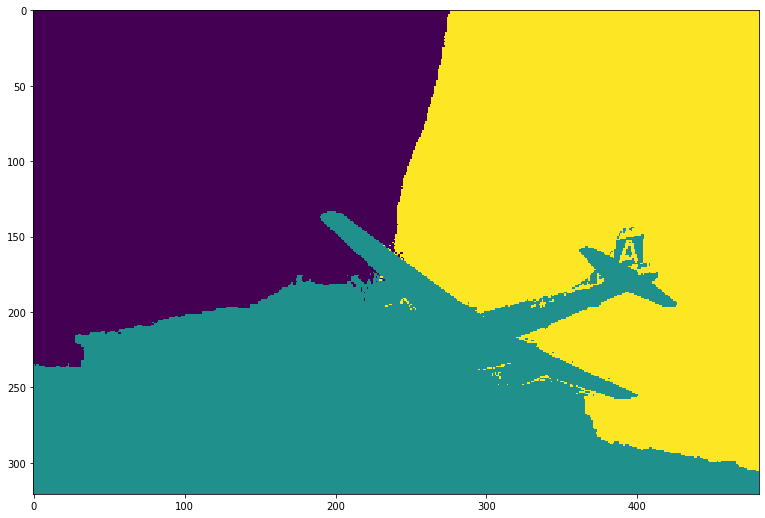

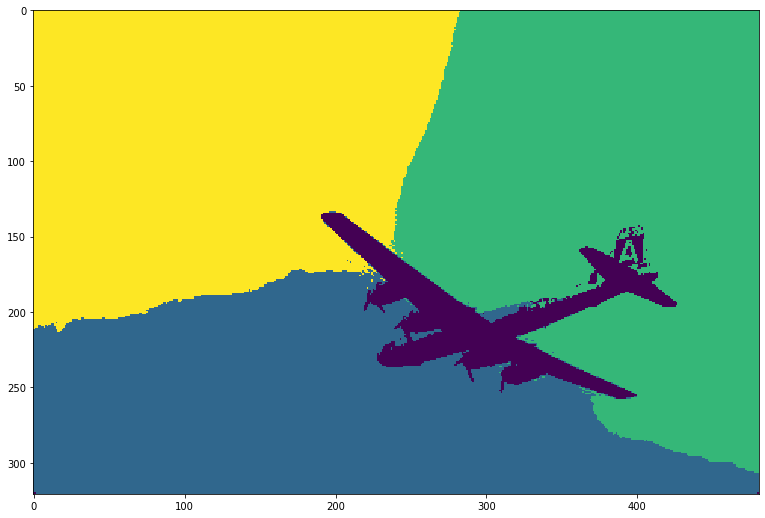

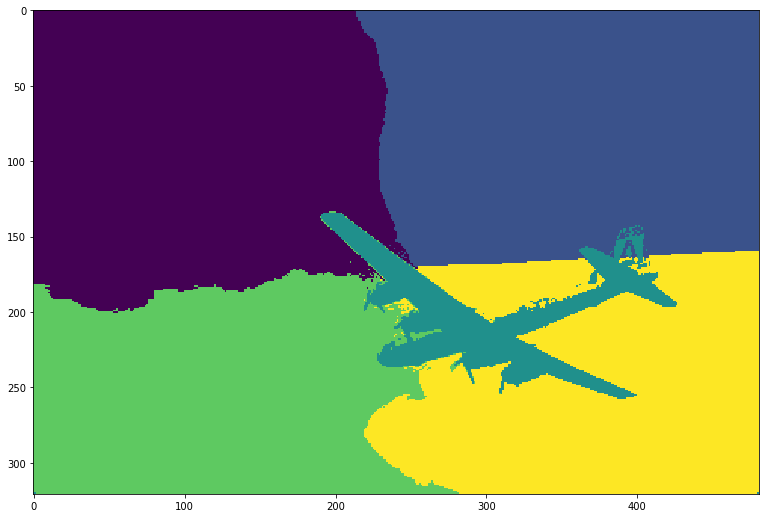

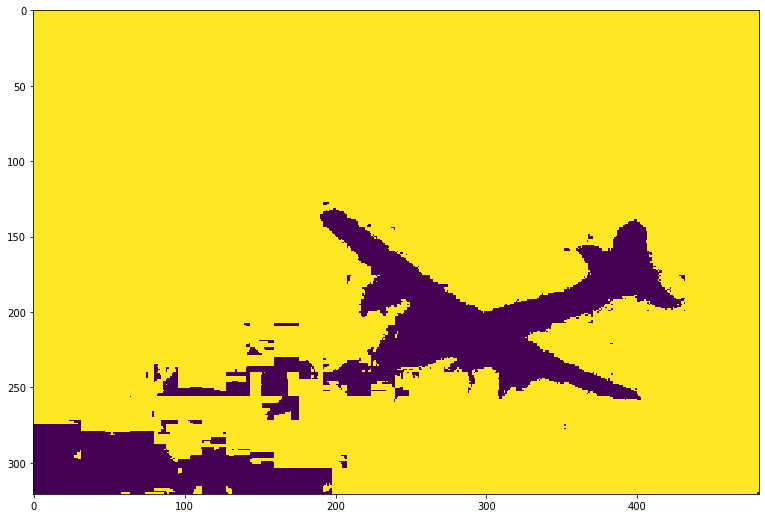

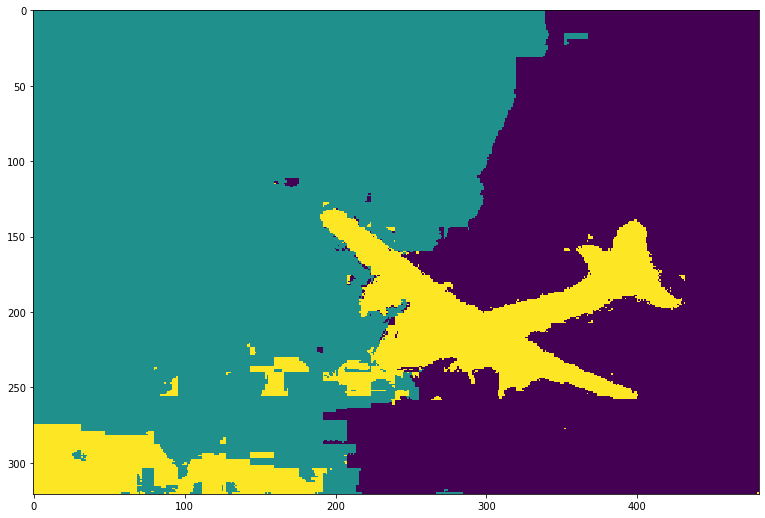

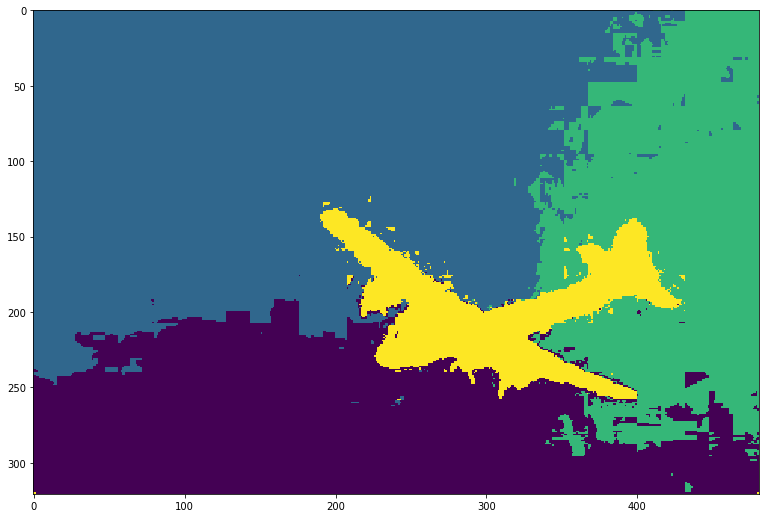

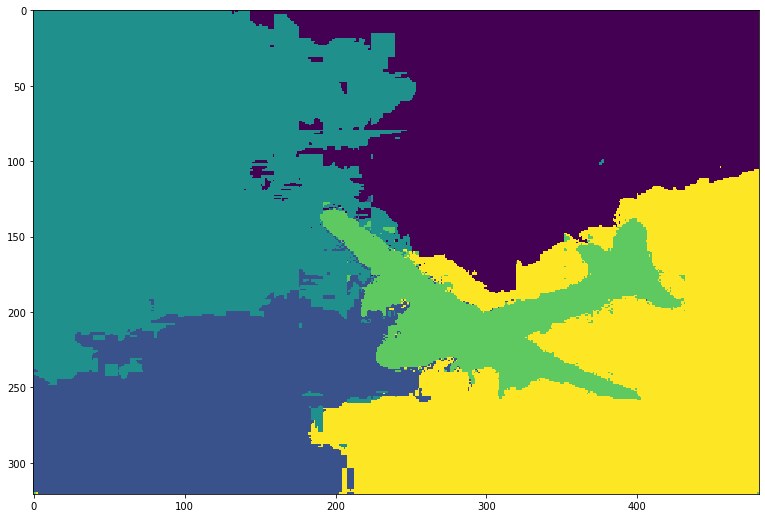

In [9]:
solve(['EECE5644_2019Fall_Homework4Questions_42049_colorBird.jpg','EECE5644_2019Fall_Homework4Questions_3096_colorPlane.jpg'])

## Answer 2

In [10]:
def sample_class2():
    rad=np.random.uniform(2,3)
    theta=np.random.uniform(-np.pi,np.pi)
    return np.matrix([rad*np.cos(theta),rad*np.sin(theta)])

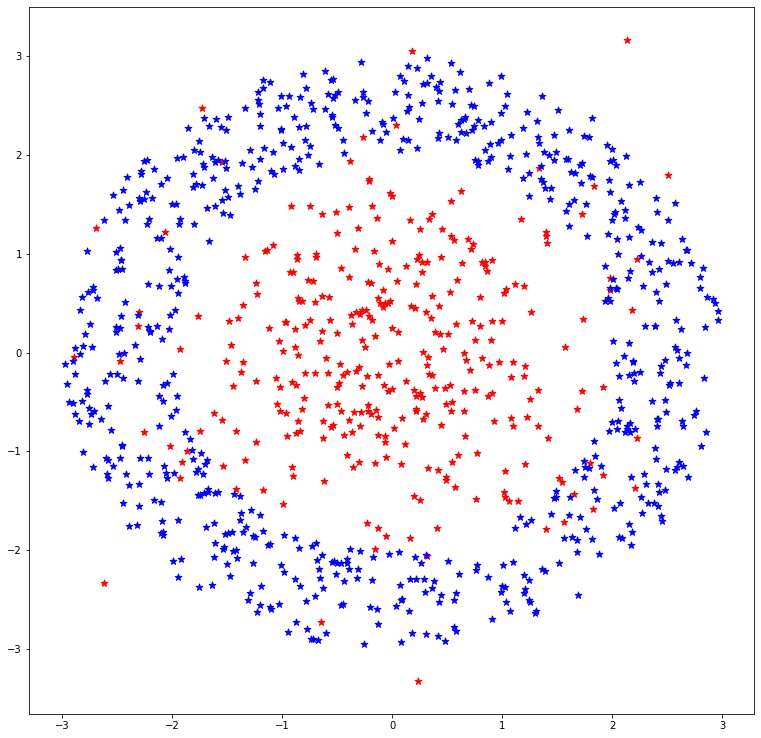

In [11]:
fig = plt.figure(figsize=(13,13));
prior=0.35
zero_mean=[0,0]
cov=[[1,0],[0,1]]
samples_class1=[]
samples_class2=[]
for num in range(1000):    
    uniform_sample=np.random.uniform()
    if uniform_sample<prior:
        sample=np.random.multivariate_normal(zero_mean,cov,[1]).transpose()
        samples_class1.append(sample)
    else:
        sample=sample_class2().T
        samples_class2.append(sample)
samples_class1=np.hstack(samples_class1)
samples_class2=np.hstack(samples_class2)

a=np.squeeze(np.asarray(samples_class1.transpose()[:,1]))
b=np.squeeze(np.asarray(samples_class1.transpose()[:,0]))

c=np.squeeze(np.asarray(samples_class2.transpose()[:,1])) 
d=np.squeeze(np.asarray(samples_class2.transpose()[:,0]))

plt.scatter(b,a,color='r',marker='*',label='class 1',s=50)
plt.scatter(d,c,color='b',marker='*',label='class 1',s=50)



In [12]:
X=np.hstack([samples_class1,samples_class2])
X=X.T
X=np.squeeze(np.asarray(X))

In [13]:
X.shape

(1000, 2)

In [14]:
y = np.hstack((np.zeros(samples_class1.shape[1]), np.ones(samples_class2.shape[1])))

In [15]:
y.shape

(1000,)

In [120]:

svc = svm.SVC(probability=True)
parameters = {'C':np.logspace(-5, 5, 10, endpoint=True).tolist(),'gamma':np.logspace(-5, 5, 10, endpoint=True).tolist()}
model = GridSearchCV(svc, parameters, cv=10)
model

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1e-05, 100000.0], 'gamma': [1e-05, 100000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [121]:
model.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1e-05, 100000.0], 'gamma': [1e-05, 100000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [122]:
y_pred=model.predict(X)
np.sum(y_pred==y)

669

In [125]:
model.best_estimator_

SVC(C=1e-05, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [116]:
def plot_SVM():
    from matplotlib.pyplot import figure
    fig = plt.figure(figsize=(15,10));
    plt.xlabel('Variable x1',size=13)
    plt.ylabel('Variable x2',size=13)
    fig.suptitle('Logistic Regression decision boundary for data from 2 Gaussians', fontsize=15)
    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1] # True Positive for class 0 and class 1 respectively
    # tp0 is boolean with "tp and class=0"
    X0, X1 = X[y == 0], X[y == 1] # points 
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]
    
    # class 0: dots
    #plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='x', color='red')
    #plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x', s=20, color='#990000')  # dark red
    
    # class 1: dots
    #plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='white')
    #plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='*', s=20, color='#000099')  # dark blue
    plt.scatter(4,4,color='blue')
    plt.scatter(-4,-4,color='blue')
    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z=model.predict_proba((np.c_[xx.ravel(), yy.ravel()]))[:,1]
    Z=Z.reshape(xx.shape)
    
    plt.pcolormesh(xx, yy, Z, cmap='plasma',norm=colors.Normalize(0., 1.), zorder=0)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='black');
    plt.subplots_adjust(top=.95);


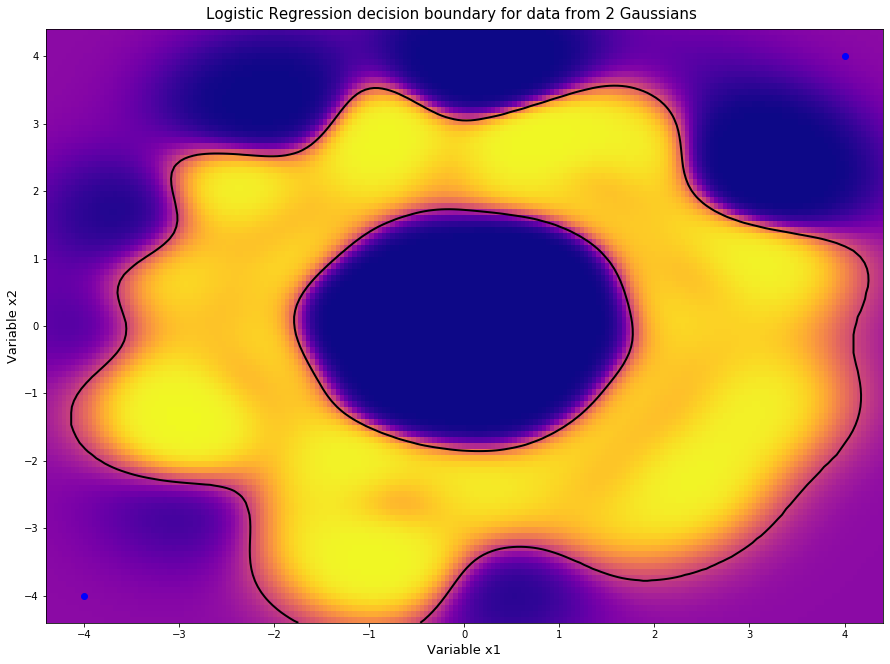

In [117]:
plot_SVM()